In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Geradores de dados
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Geradores
train_gen = train_datagen.flow_from_directory(
    './gender/treino', target_size=(96,96), batch_size=32, color_mode='grayscale', class_mode='binary')

val_gen = val_test_datagen.flow_from_directory(
    './gender/validacao', target_size=(96,96), batch_size=32, color_mode='grayscale',  class_mode='binary')

test_gen = val_test_datagen.flow_from_directory(
    './gender/teste', target_size=(96,96), batch_size=32, class_mode='binary', color_mode='grayscale',  shuffle=False)

Found 2722 images belonging to 2 classes.
Found 583 images belonging to 2 classes.
Found 586 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(96, 96, 1)),
    # 32 filtros de convolucao 3x3 na imagem
    # Usa funcao de ativacao relu
    Conv2D(32, (3, 3), activation='relu'),
    # Reduz o tamanho da imagem pela metade
    MaxPooling2D(2, 2),

    # 64 filtros de convolucao 3x3
    Conv2D(64, (3, 3), activation='relu'),
    # Reduz o tamanho pela metade
    MaxPooling2D(2, 2),

    # 128 filtros de convolucao 3x3
    Conv2D(128, (3, 3), activation='relu'),
    # Reduz pela metade
    MaxPooling2D(2, 2),

    # Achatando em um vetor
    Flatten(),

    # Zerando neuronios para evitar overfitting
    Dropout(0.5),

    # Camada densa (fully-connected)
    Dense(128, activation='relu'),

    # Camada de saida (binaria)
    # Usa sigmoid
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

Epoch 1/20


C:\Users\enriq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.5233 - loss: 0.6901 - val_accuracy: 0.7290 - val_loss: 0.5665
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.7242 - loss: 0.5540 - val_accuracy: 0.7633 - val_loss: 0.5029
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.7735 - loss: 0.4848 - val_accuracy: 0.8045 - val_loss: 0.4512
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8179 - loss: 0.4225 - val_accuracy: 0.7890 - val_loss: 0.4630
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8305 - loss: 0.4036 - val_accuracy: 0.8456 - val_loss: 0.3694
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8442 - loss: 0.3665 - val_accuracy: 0.8645 - val_loss: 0.3418
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8613 - loss: 0.3353 - val_accuracy: 0.8593 - val_loss: 0.3210
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8719 - loss: 0.3010 - val_accuracy: 0.8799 - val_loss: 0

In [5]:
loss, acc = model.evaluate(test_gen)
print(f"Acurácia no teste: {acc:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9363 - loss: 0.1681
Acurácia no teste: 0.93


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Previsões
y_true = test_gen.classes
y_pred = (model.predict(test_gen) > 0.5).astype("int32")

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['masculino', 'feminino']))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[278  15]
 [ 25 268]]
              precision    recall  f1-score   support

   masculino       0.92      0.95      0.93       293
    feminino       0.95      0.91      0.93       293

    accuracy                           0.93       586
   macro avg       0.93      0.93      0.93       586
weighted avg       0.93      0.93      0.93       586



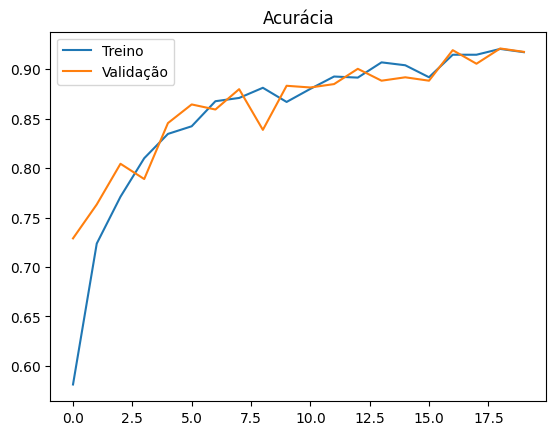

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()

In [8]:
model.save('modelo_genero.keras')